In [1]:
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from resources.ml_mlp import parse_tensorboard
from IPython.display import display

2023-01-23 10:25:38.948898: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
%pwd
%cd ../../ml/Tensorboard/

folder = r'MLP_WIN/hparam_test_2/D_0.01'
# folder = r'MLP_WIN/hparam_test'

/home/tomje/ml/Tensorboard


In [3]:
path = os.path.join(folder, r'Results/hparams_table.csv')
results = pd.read_csv(path)
# results.sort_values(by=['epochs','no_nodes']).reset_index(drop=True)

In [4]:
metrics = ['CV MAE (µm)',
         'CV MSE (µm²)',
         'CV R²',
         'CV Std MAE (± µm)',
         'CV Std MSE (± µm²)',
         'CV Std R² (±)',
         'Val MAE (µm)',
         'Val MSE (µm²)',
         'Val R²']

hparams = [hp for hp in results.keys() if hp not in metrics and results[hp].nunique() != 1]
hparams

['no_layers', 'batch_size', 'init_mode']

Attempt to load in scalar data to pandas

In [5]:
scalars = ['cv_iter/mse', 'cv_iter/mae', 'cv_iter/r2']

dirs = os.listdir(folder)
a = ['MLP_Win-', 'MLP-', 'LSTM-']
dirs = [x for x in dirs if any(a in x for a in a)]
dirs.sort()

In [6]:
df = {x: parse_tensorboard(os.path.join(folder, x), scalars)
                        for x in dirs}
df = pd.concat(df.values(), keys=df.keys())

results['trial_id'] = df.index.levels[0]
for col in df.columns.values:
    if 'mse' in col:
        scale = 1e6
    elif 'mae' in col:
        scale = 1e3
    else:
        scale = 1
            
    data = [df.loc[trial_id][col].values * scale for trial_id in df.index.levels[0]]
    results[col] = data
results

,loss,no_layers,batch_size,init_mode,seq_len,epochs,dropout,no_nodes,CV MAE (µm),CV MSE (µm²),...,CV Std MAE (± µm),CV Std MSE (± µm²),CV Std R² (±),Val MAE (µm),Val MSE (µm²),Val R²,trial_id,cv_iter/mse,cv_iter/mae,cv_iter/r2
0,mse,4.0,10.0,glorot_normal,5.0,1500.0,0.01,128.0,1.134514,11.101724,...,0.537316,13.174956,0.110939,1.233364,16.500011,0.849151,MLP_Win-WLEN-5-E-1500-B-10-L-[128 128 128 128]...,"[2.7858222, 1.7415421, 7.9632964, 4.1794395, 5...","[0.9482118, 0.58955264, 1.6189917, 1.260116, 2...","[0.9771278, 0.9835171, 0.9411451, 0.97538114, ..."
1,mse,4.0,10.0,glorot_uniform,5.0,1500.0,0.01,128.0,1.149227,12.564835,...,0.599496,15.122651,0.133065,0.745282,2.410870,0.977222,MLP_Win-WLEN-5-E-1500-B-10-L-[128 128 128 128]...,"[9.700318, 22.098186, 0.44840708, 34.44905, 0....","[1.0884784, 1.8996018, 0.5392738, 1.3084352, 0...","[0.9119341, 0.83029604, 0.9941524, 0.78617007,..."
2,mse,4.0,10.0,he_normal,5.0,1500.0,0.01,128.0,1.157400,13.250427,...,0.539209,15.054667,0.121565,1.325758,5.673447,0.936187,MLP_Win-WLEN-5-E-1500-B-10-L-[128 128 128 128]...,"[19.763441, 6.8122663, 28.578888, 0.9273725, 1...","[1.3104812, 1.1015152, 1.6303322, 0.63016486, ...","[0.8167685, 0.92237186, 0.80219275, 0.99293894..."
3,mse,4.0,10.0,he_uniform,5.0,1500.0,0.01,128.0,1.303236,17.042984,...,0.617691,18.246546,0.146899,0.769892,3.264679,0.970881,MLP_Win-WLEN-5-E-1500-B-10-L-[128 128 128 128]...,"[0.7116945, 11.23753, 2.1193745, 13.083852, 41...","[0.60948414, 1.5646882, 0.61512655, 1.0988811,...","[0.9906601, 0.90665686, 0.9777763, 0.89029783,..."
4,mse,4.0,10.0,random_normal,5.0,1500.0,0.01,128.0,1.084651,11.691750,...,0.542619,15.075633,0.102099,2.188258,35.588223,0.670492,MLP_Win-WLEN-5-E-1500-B-10-L-[128 128 128 128]...,"[0.5362413, 4.471814, 10.629181, 19.449116, 12...","[0.49023545, 0.82056653, 0.9234507, 1.466556, ...","[0.994685, 0.9520744, 0.89226407, 0.8875939, 0..."
5,mse,3.0,10.0,glorot_normal,5.0,1500.0,0.01,128.0,1.376464,17.423479,...,0.557028,17.877644,0.140004,1.168211,11.898897,0.885875,MLP_Win-WLEN-5-E-1500-B-10-L-[128 128 128]-D-0...,"[43.470303, 1.5585486, 5.107787, 9.995006, 28....","[1.7949163, 0.8234476, 0.9119037, 2.3591394, 1...","[0.67710614, 0.98558086, 0.9566869, 0.8999332,..."
6,mse,3.0,10.0,glorot_uniform,5.0,1500.0,0.01,128.0,1.494037,18.252262,...,0.852378,23.526625,0.145708,1.588122,9.714202,0.917081,MLP_Win-WLEN-5-E-1500-B-10-L-[128 128 128]-D-0...,"[26.368307, 3.2445123, 21.38599, 6.0748124, 60...","[1.8398501, 1.0450816, 2.1237457, 0.8692931, 2...","[0.81203604, 0.96266675, 0.821373, 0.9261732, ..."
7,mse,3.0,10.0,he_normal,5.0,1500.0,0.01,128.0,1.364963,14.750966,...,0.642060,15.219510,0.136585,1.333207,20.494110,0.810856,MLP_Win-WLEN-5-E-1500-B-10-L-[128 128 128]-D-0...,"[19.66601, 32.25654, 8.265861, 20.18985, 19.55...","[1.5132744, 3.1349, 1.3054342, 1.293115, 2.035...","[0.85432786, 0.8058038, 0.90439826, 0.78712344..."
8,mse,3.0,10.0,he_uniform,5.0,1500.0,0.01,128.0,1.377676,19.072025,...,0.644955,20.679070,0.156056,1.430625,16.359810,0.850849,MLP_Win-WLEN-5-E-1500-B-10-L-[128 128 128]-D-0...,"[7.103475, 5.0404654, 1.6161557, 13.695735, 0....","[0.9427397, 0.86873937, 0.66734403, 1.1859068,...","[0.9438618, 0.94146407, 0.9868809, 0.88187367,..."
9,mse,3.0,10.0,random_normal,5.0,1500.0,0.01,128.0,1.548457,19.326279,...,0.721146,22.672712,0.155855,2.410104,28.134380,0.798425,MLP_Win-WLEN-5-E-1500-B-10-L-[128 128 128]-D-0...,"[1.5812582, 6.650422, 25.190203, 7.0261946, 1....","[0.88395, 1.1346087, 2.0774286, 1.0965921, 0.9...","[0.981634, 0.93541026, 0.8255244, 0.9139256, 0..."


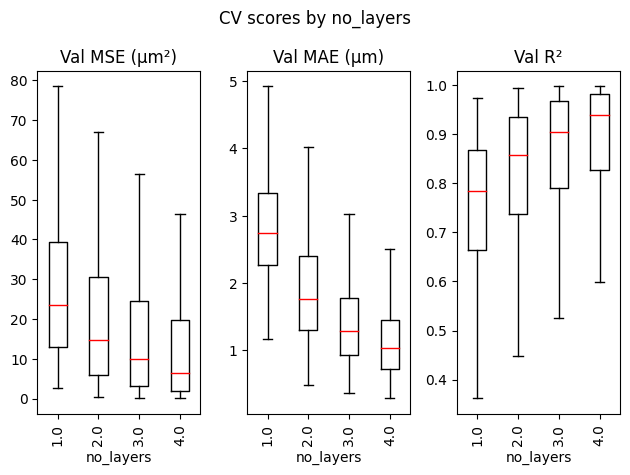

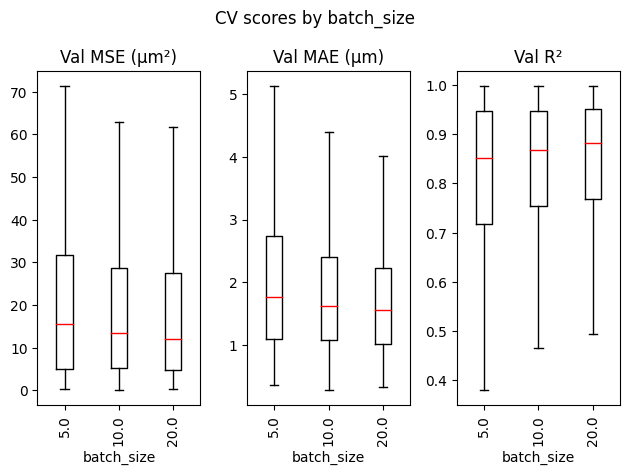

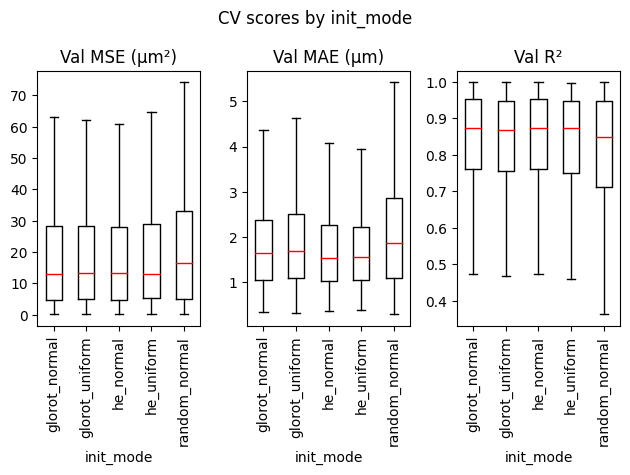

In [7]:
def cv_iter_boxplot(results, hparam, scalars):
    test = [results.groupby(hparam)[scalar].apply(np.hstack) for scalar in scalars]    
    test = pd.concat(test, axis=1)
    fig, axes = plt.subplots(1, 3)
    for i, ax in enumerate(axes):
        ax.boxplot(x=test.iloc[:,i], labels=test.index.values, showfliers=False, medianprops={'color': 'r'})
        ax.set_xlabel(hparam)
        # ax.set_ylabel(test.columns.values[i])
        ax.tick_params('x', labelrotation=90)
    
    fig.suptitle(f'CV scores by {hparam}')
    axes[0].set_title('Val MSE (µm²)')
    axes[1].set_title('Val MAE (µm)')
    axes[2].set_title('Val R²')
    plt.tight_layout()

for hparam in hparams:
    cv_iter_boxplot(results, hparam, scalars)


    

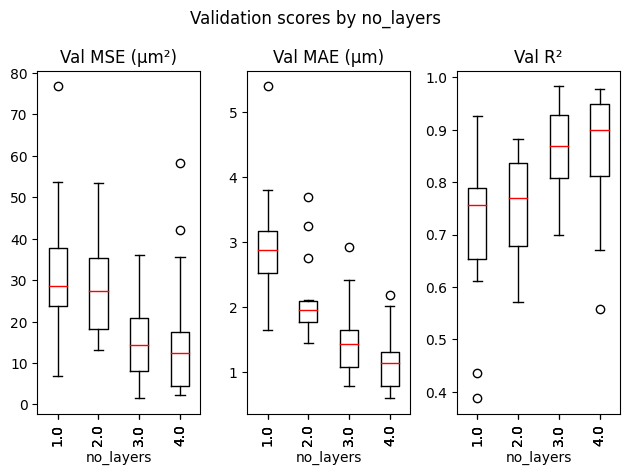

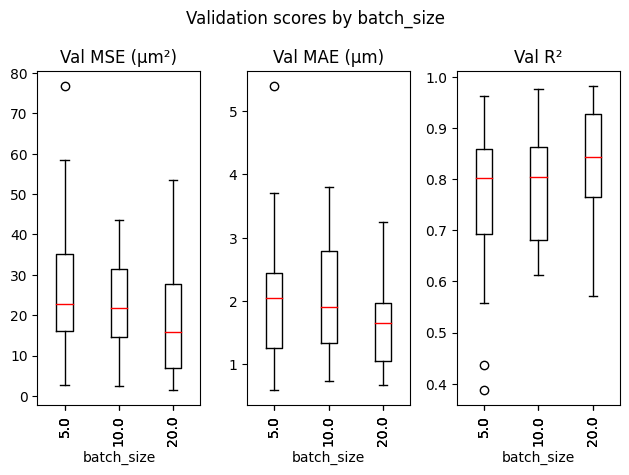

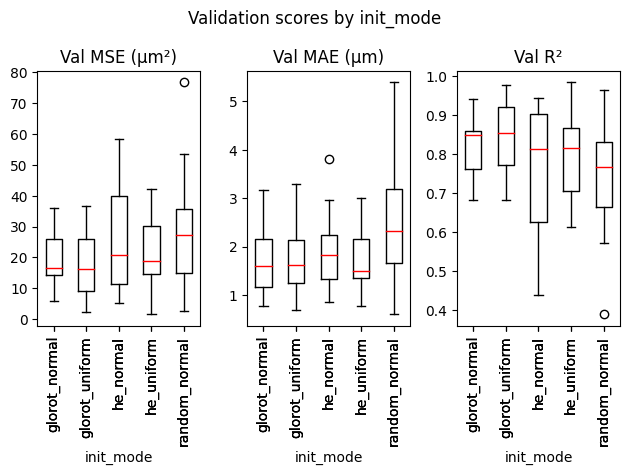

In [8]:
def plt_boxplot(result_df, hparam):
    plt.rc('font', weight='normal')
    axes = result_df.boxplot(column=['Val MSE (µm²)', 'Val MAE (µm)', 'Val R²'],
                      by=hparam,
                      layout=(1,3),
                      rot=90,
                      sharey=False,
                      showfliers=True,
                      grid=False,
                      color=dict(boxes='k', whiskers='k', medians='r', caps='k'),
                     )
    plt.suptitle(f'Validation scores by {hparam}')
    plt.tight_layout()

for hparam in hparams:
    plt_boxplot(results, hparam)

In [9]:
def mean_hparam(result_df, hparam):
    other_hp = [hp for hp in hparams if hp is not hparam]
    result_df = result_df.groupby([hparam]).mean(numeric_only=True).drop(columns=other_hp, errors='ignore')
    display(result_df.loc[:,result_df.nunique()!=1])
    
for hparam in hparams:
    mean_hparam(results, hparam)

,CV MAE (µm),CV MSE (µm²),CV R²,CV Std MAE (± µm),CV Std MSE (± µm²),CV Std R² (±),Val MAE (µm),Val MSE (µm²),Val R²
no_layers,,,,,,,,,
1.0,2.881906,35.437617,0.686459,0.765430,45.869061,0.396190,2.938870,31.172158,0.717172
2.0,1.920513,21.574960,0.816773,0.677823,20.678377,0.149414,2.113231,27.818592,0.752437
3.0,1.401078,16.464805,0.860905,0.633972,17.527341,0.132771,1.496733,15.732352,0.862038
4.0,1.157083,13.310952,0.887502,0.562860,15.982875,0.123204,1.180704,16.763527,0.851704


,CV MAE (µm),CV MSE (µm²),CV R²,CV Std MAE (± µm),CV Std MSE (± µm²),CV Std R² (±),Val MAE (µm),Val MSE (µm²),Val R²
batch_size,,,,,,,,,
5.0,2.008305,24.597637,0.785478,0.704590,29.021972,0.244672,2.097346,27.178799,0.757609
10.0,1.817869,19.922125,0.829707,0.657494,19.435882,0.145527,2.025224,22.539031,0.793521
20.0,1.694260,20.571488,0.823545,0.617979,26.585387,0.210986,1.674585,18.897142,0.836383


,CV MAE (µm),CV MSE (µm²),CV R²,CV Std MAE (± µm),CV Std MSE (± µm²),CV Std R² (±),Val MAE (µm),Val MSE (µm²),Val R²
init_mode,,,,,,,,,
glorot_normal,1.800541,21.113441,0.817738,0.658425,24.544632,0.208059,1.742037,19.531157,0.820752
glorot_uniform,1.886776,19.853746,0.827584,0.689647,19.512829,0.145939,1.758973,17.992119,0.845952
he_normal,1.725575,21.911645,0.813971,0.628526,27.859887,0.214801,1.955584,26.164593,0.764541
he_uniform,1.719444,22.924901,0.800482,0.655543,33.593750,0.285577,1.721750,21.630360,0.804995
random_normal,2.068389,22.681685,0.804774,0.667965,19.560968,0.147597,2.483580,29.040058,0.742949
